In [2]:
import pandas as pd
from termcolor import colored
%autosave 60

Autosaving every 60 seconds


#### I. Classification

### 1. k-Nearest Neighbors

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

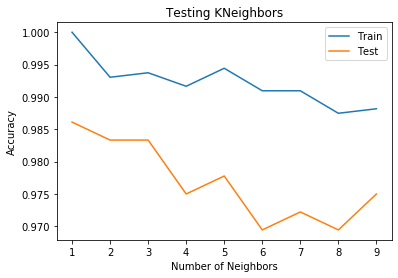

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range=range(1,10)
scores_train=[]
scores_test=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train) # predict on train
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train))
    y_pred_test = knn.predict(X_test) # predict on test
    scores_test.append(metrics.accuracy_score(y_test, y_pred_test))
    
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
fig = plt.figure()
plt.plot(k_range, scores_train,label='Train')
plt.plot(k_range, scores_test,label='Test')
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
# plt.figtext(.5, .8, "with k=1, gain the best accuracy",c='blue',fontstyle='oblique')
plt.title('Testing KNeighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

With k=3 >> best fit

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test) # predict on test
knn_score=(metrics.accuracy_score(y_test, y_pred_test))

###  

### 2. Support Vector Machine

In [11]:
# import tensorflow as tf
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
# pip install mnist

Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [39]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn import svm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

c=0
while c<=2:
    if c==0:
        clf = svm.SVC(kernel='linear') # linear Kernel
    elif c==1: 
        clf = svm.SVC(kernel='poly') # poly Kernel
    elif c==2:
        clf = svm.SVC() # rbf Kernel    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification report for classifier %s:\n%s" % (clf, metrics.classification_report(y_test, y_pred)),
          colored('__________________________________________________________________________________\n','red'))
    c+=1

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        34
           2       1.00      0.98      0.99        42
           3       1.00      0.98      0.99        43
           4       1.00      1.00      1.00        36
           5       0.97      1.00      0.99        35
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        26
           9       0.97      0.97      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg 

The result of kernel poly a litte bit better than linear since its precision and recall are slightly higher >> poly is the choice

In [41]:
clf = svm.SVC(kernel='poly') # poly Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svm_score=metrics.accuracy_score(y_test, y_pred)
# print(svm_score)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


###  

### 3. Naive Bayes

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# load the digits dataset: digits
digits = datasets.load_digits()

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [3]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8472222222222222


array([[33,  0,  0,  0,  1,  2,  0,  1,  0,  0],
       [ 0, 28,  1,  0,  0,  0,  1,  1,  0,  2],
       [ 0,  2, 28,  2,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 28,  0,  1,  5,  1,  0],
       [ 0,  0,  0,  1,  0, 23,  1,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  2, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  6, 28,  0],
       [ 0,  2,  0,  2,  0,  1,  0,  3,  5, 23]], dtype=int64)

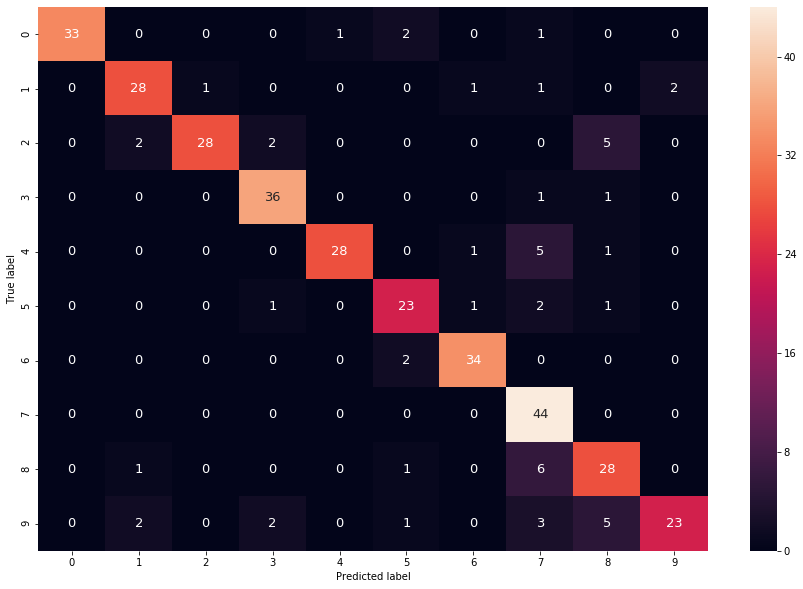

In [4]:
cm=confusion_matrix(y_test, y_pred)
# ax = plt.subplots()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(cm,annot=True,annot_kws={"size": 13})
ax.set_ylim(10.0, 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
nb_score=metrics.accuracy_score(y_test, y_pred)

##### Compute the accuracy of different classifiers in the same plot

<BarContainer object of 3 artists>

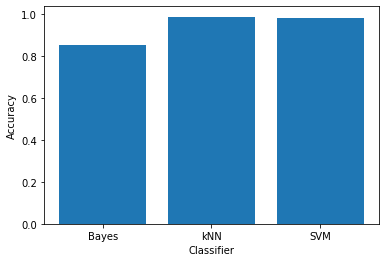

In [48]:
classifier = ['Bayes','kNN', 'SVM']
accuracy = [nb_score,knn_score,svm_score]
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.bar(classifier,accuracy)

###  

#### II. Regression

### 1. Linear Regression

In [92]:
gap=pd.read_csv('data/gapminder.csv')
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


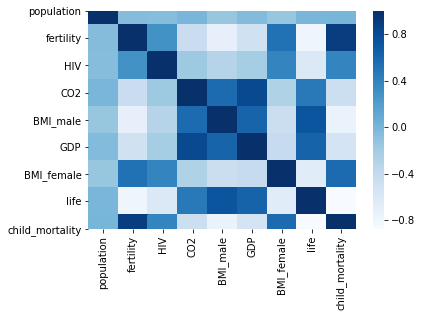

In [93]:
import seaborn as sns
sns.heatmap(gap.corr(), cmap='Blues')

In [94]:
from sklearn.model_selection import train_test_split
import numpy as np

X = gap['fertility'].values.reshape(-1,1)
y = gap['life'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

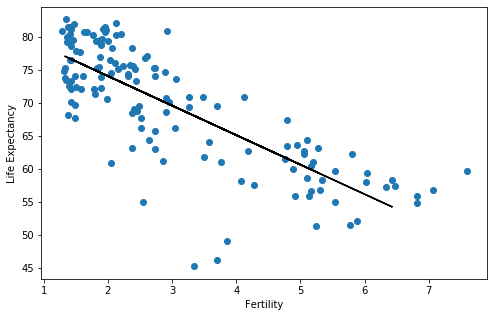

In [95]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(x='fertility', y='life', data=gap)
plt.plot(X_test, y_pred, c='black')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

In [63]:
# from sklearn.metrics import accuracy_score
# print('Accuracy with 1 feature: ',accuracy_score(y_test,y_pred))

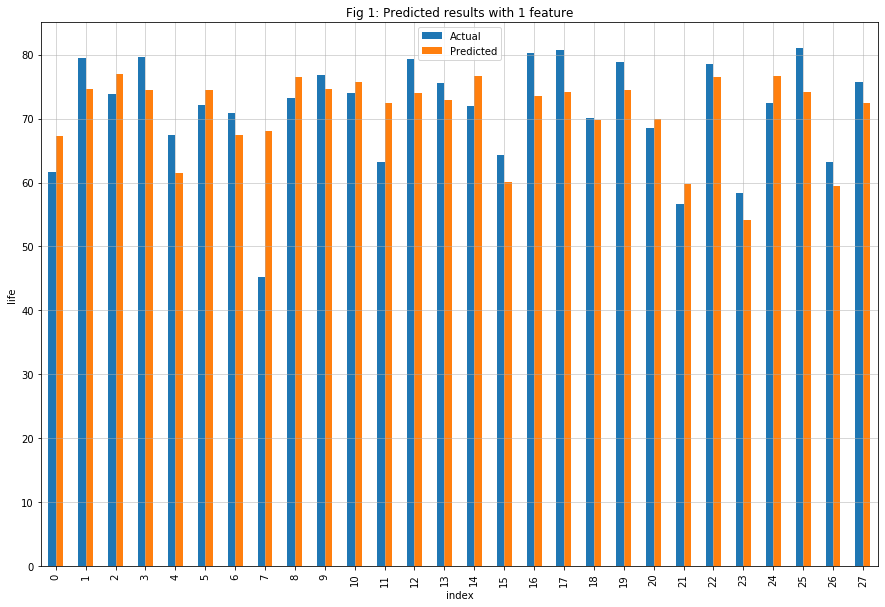

In [96]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Fig 1: Predicted results with 1 feature')
plt.xlabel('index')
plt.ylabel('life')
plt.show()

##### Predict with all features

In [80]:
gap.Region.value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                    7 
Name: Region, dtype: int64

In [81]:
gap.head(1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.5962,12314,129.9049,75.3,29.5,Middle East & North Africa


In [97]:
#split dataset in features and target variable
feature_cols = ['population','fertility', 'HIV', 'CO2','BMI_male', 'BMI_female','child_mortality']
X = gap[feature_cols] # Features
y = gap.life.values # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

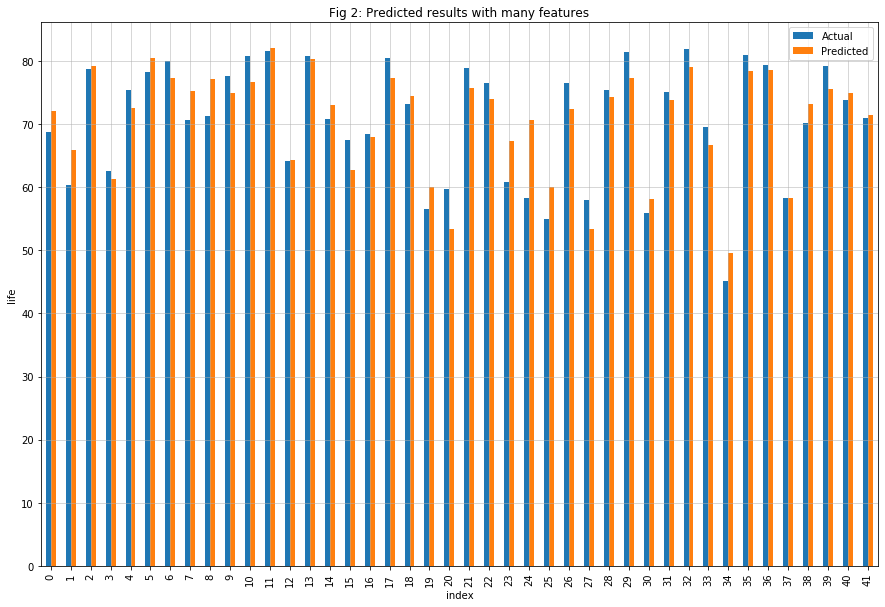

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Fig 2: Predicted results with many features')
plt.xlabel('index')
plt.ylabel('life')
plt.show()

With more than 1 feature, we gain more predicted values.